<font size="3"><b>Titanic</b> </font>

In [1]:
import pandas as pd 

In [2]:
df=pd.read_csv("train.csv")

In [3]:
#Diplay top/bottom 5 rows 
df.head(5)
df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
#Find Shape of dataset 
print(f"Dataframe containts {df.shape[0]} rows and {df.shape[1]} columns")

Dataframe containts 891 rows and 12 columns


In [5]:
#Basic Info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#Overall numerical staticts 
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
#Data Filtering 
sum(df['Sex']=='male')

577

In [10]:
sum(df['Survived']==1)

342

In [11]:
#Check null values
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

<Axes: >

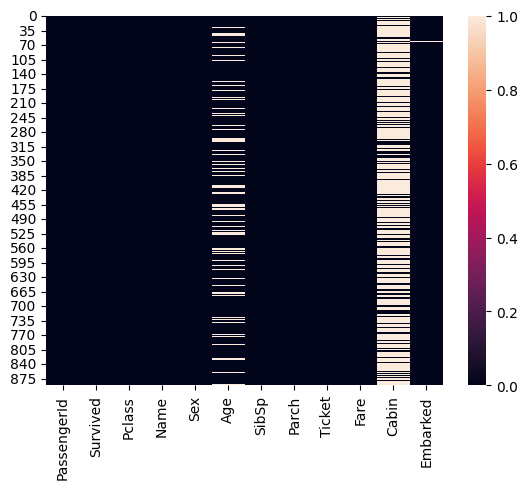

In [12]:
sns.heatmap(df.isnull())

In [13]:
#Percentage of missing values 
pct_missing=df.isnull().sum()*100/len(df)

In [14]:
pct_missing

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [15]:
#Drop the column 
df.drop('Cabin',axis=1,inplace=True)

In [16]:
#We dont dropna values from embarked. We will replace them with most frequent value
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [17]:
#handle missing values 
df['Embarked'].fillna('S',inplace=True)

C:\Users\Dimitris\AppData\Local\Temp\ipykernel_3828\572878318.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna('S',inplace=True)


In [18]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [19]:
#Lets do the same with age:
round(df['Age'].mean(),2)

np.float64(29.7)

In [20]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

C:\Users\Dimitris\AppData\Local\Temp\ipykernel_3828\694922604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [21]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [22]:
#Categorical Data Encoding
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [23]:
#For Sex Category 
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [24]:
#The column we will add
x=df['Sex'].map({'male':1,'female':0})

In [25]:
df.insert(5,'Gender_new',x)

In [26]:
#we will encode Embarked column as well 

In [27]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [51]:

df1=pd.get_dummies(df,columns=['Embarked'])

In [52]:
df1["Embarked_C"]=df1["Embarked_C"].astype(int)

In [53]:
df1["Embarked_S"]=df1["Embarked_S"].astype(int)

In [54]:
df1["Embarked_Q"]=df1["Embarked_Q"].astype(int)

In [56]:
df1.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Gender_new,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,1,22.0,1,0,A/5 21171,7.25,0,0,1


In [ ]:
#univariate analysis

<Axes: xlabel='Survived', ylabel='count'>

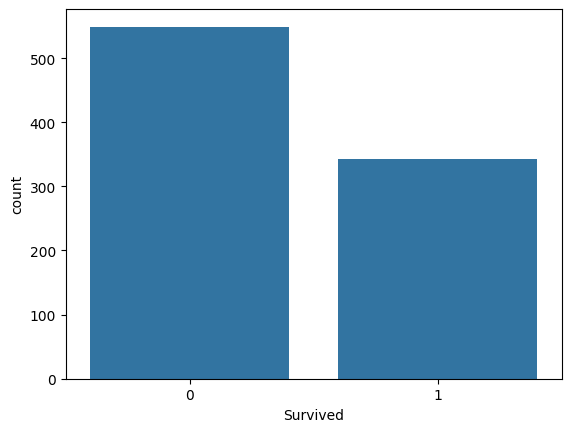

In [71]:
sns.countplot(x=df1['Survived'])

In [62]:
#How many people survided 
len(df[df['Survived']==1])

342

In [66]:
df['Pclass'].unique()

array([3, 1, 2])

In [67]:
#How many passengers were in First Class,Second or Third Class
len(df[df['Pclass']==1])

216

In [68]:
len(df[df['Pclass']==2])

184

In [69]:
len(df[df['Pclass']==3])

491

<Axes: xlabel='Pclass', ylabel='count'>

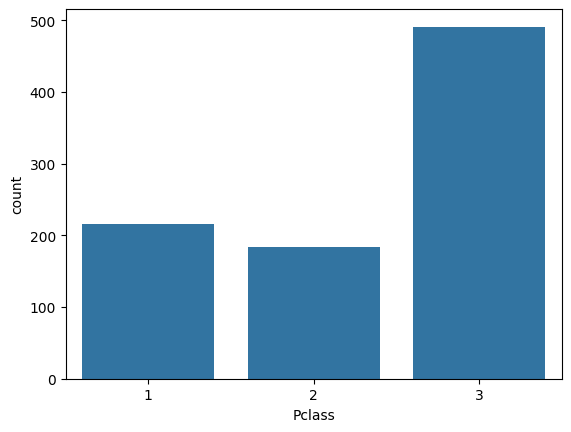

In [74]:
sns.countplot(x=df1['Pclass'])

In [73]:
#Number of male/female passengers 
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

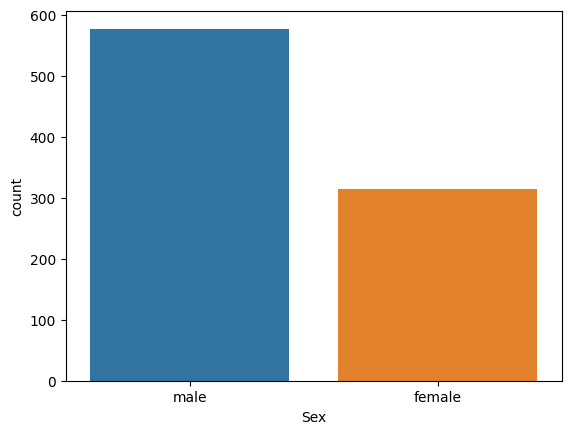

In [79]:
sns.countplot(x=df['Sex'],hue=df['Sex'])

<Axes: >

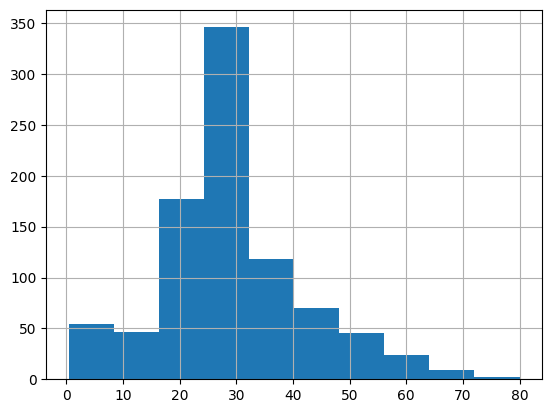

In [80]:
df['Age'].hist()

<Axes: ylabel='Age'>

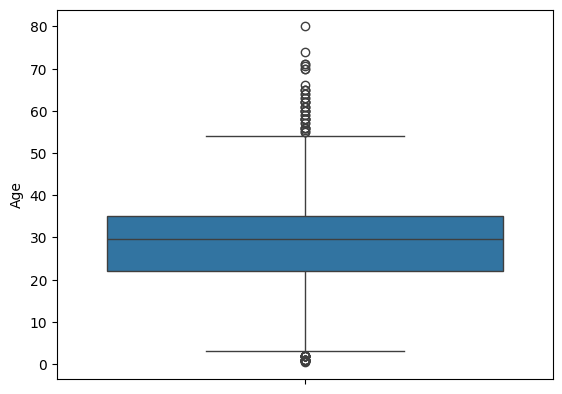

In [83]:
sns.boxplot(df1['Age'],orient='v')

In [ ]:
#Bivariate Analysis


In [ ]:
#Who has a better chance of surving, male or female

<Axes: xlabel='Sex', ylabel='Survived'>

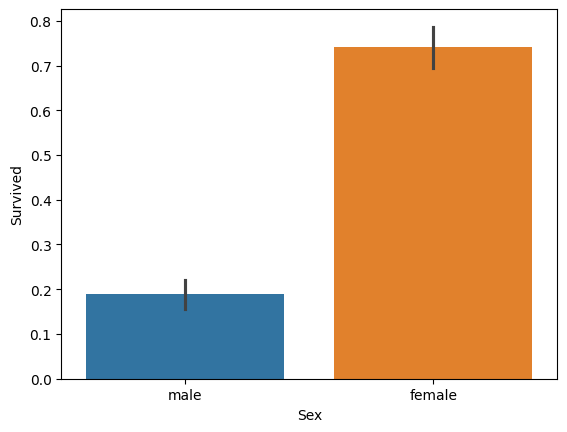

In [94]:
sns.barplot(x='Sex',y='Survived',data=df1,hue='Sex')

In [124]:
#To calculate this 
p_s=len(df[df['Survived']==1])/len(df)

In [125]:
p_sm=len(df[(df['Survived']==1) & (df['Sex']=='male')])/len(df)

In [126]:
Prob_male_s=p_sm/p_s

In [127]:
Prob_male_s

0.31871345029239767

In [128]:
p_sf=len(df[(df['Survived']==1) & (df['Sex']=='female')])/len(df)

In [129]:
Prob_female_s=p_sf/p_s

In [130]:
Prob_female_s

0.6812865497076023

<Axes: xlabel='Pclass', ylabel='Survived'>

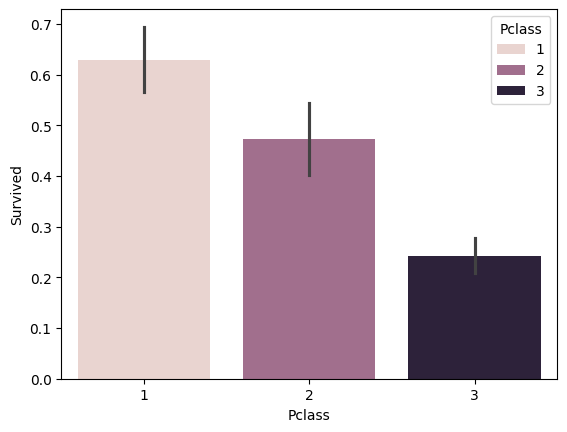

In [131]:
#Which passenger class has better chance of survival
sns.barplot(x='Pclass',y='Survived',data=df1,hue='Pclass')

In [137]:
df1.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Gender_new       int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked_C       int64
Embarked_Q       int64
Embarked_S       int64
dtype: object

In [138]:
# Feature Engineering 
df1['Family_Size']=df1['SibSp']+df1['Parch']

In [141]:
df1.drop(columns=['SibSp','Parch'],inplace=True)

In [144]:
df1['Fare_Per_Person']=df1['Fare']/(df1['Family_Size']+1)

In [146]:
df1.drop(columns=['Fare','Family_Size'],inplace=True)

In [147]:
df1

,PassengerId,Survived,Pclass,Name,Sex,Gender_new,Age,Ticket,Embarked_C,Embarked_Q,Embarked_S,Fare_Per_Person
0,1,0,3,"Braund, Mr. Owen Harris",male,1,22.000000,A/5 21171,0,0,1,3.62500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0,38.000000,PC 17599,1,0,0,35.64165
2,3,1,3,"Heikkinen, Miss. Laina",female,0,26.000000,STON/O2. 3101282,0,0,1,7.92500
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0,35.000000,113803,0,0,1,26.55000
4,5,0,3,"Allen, Mr. William Henry",male,1,35.000000,373450,0,0,1,8.05000
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,1,27.000000,211536,0,0,1,13.00000
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,19.000000,112053,0,0,1,30.00000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0,29.699118,W./C. 6607,0,0,1,5.86250
889,890,1,1,"Behr, Mr. Karl Howell",male,1,26.000000,111369,1,0,0,30.00000
